# PHAS2441 Session 6:  Matrices eigenvectors

Fahad Chohan
Last updated: 24/01/17

You are going to calculate the normal modes of vibration of a system of $N$ beads connected by $N+1$ Hookean springs to fixed end points. The beads are able to move horizontally but not vertically. This provides us with a basic but useful model of vibrations in a solid, where the beads represent atoms and the springs the interatomic bonds.

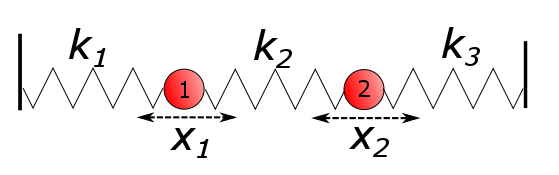

In [1]:
from IPython.display import Image # needed to embed an image
Image(filename='3springs2beads.png', embed=True)
# This image file is on Moodle. 
# It will appear here if you downloaded the image and it's in the same folder as this notebook!

First consider a system of just two beads, labelled 1 and 2, connected by three springs with spring constants $k_1$, $k_2$, $k_3$ to two fixed end points, as in the figure above. The displacement of each bead from its equilibrium position is given by $x_1$ and $x_2$, as shown. By considering each spring individually, we can see that the forces exerted by the springs are:

** Spring 1** exerts a force $-k_1 x_1$ on bead 1.

** Spring 2** exerts a force $-k_2(x_1 - x_2)$ on bead 1 and a force $-k_2(x_2 - x_1)$ on bead 2.

** Spring 3** exerts a force $-k_3 x_2$ on bead 2.

We can then write the total forces on the beads in the form of a matrix equation:

$$
\mathbf{F} =-\mathbf{K}\cdot \mathbf{x} = -\begin{pmatrix}
    k_1 + k_2 & -k_2 \\
    -k_2 & k_2 + k_3 
  \end{pmatrix}
  \begin{pmatrix}
   x_1 \\ x_2 \end{pmatrix}
$$

This can easily be extended to a system of $N$ beads with $N+1$ springs, which gives us a [tridiagonal](http://en.wikipedia.org/wiki/Tridiagonal_matrix) matrix for the spring constants $k_i$:

$$ \mathbf{K} = 
\begin{pmatrix}
k_1 + k_2 & -k_2 & 0 &  & \ldots &  0  \\
-k_2 & k_2 + k_3 & -k_3 & & \ldots &0 \\
 0 & -k_3 & k_3 + k_4 & -k_4 & \ldots & 0 \\
\vdots &  & \ddots & & & \vdots \\
0 & 0 & \ldots &  & -k_N & k_N + k_{N+1} \\
\end{pmatrix}
$$

We also know that for a harmonic oscillator, the spring constants are related to the angular frequency by

$$ k = m \omega^2 $$

and hence when we represent this in matrix form, we have

$$ -\mathbf{K}\mathbf{x} = -m \omega^2\mathbf{x} $$

which is an eigenvalue equation of the form $\mathbf{A} \mathbf{x} = \lambda \mathbf{x}$, where the eigenvectors of the matrix $\mathbf{K}$ will give us the bead displacements for the normal modes of vibration, and the eigenvalues the angular frequency of that mode.

## Your task:

Complete this notebook by doing the following.
    
### 1. Construct the matrix $\mathbf{K}$. 
* *Hint 1a:* It may be easier to construct a one-dimensional vector of $k_i$ and then use the [np.diag](http://docs.scipy.org/doc/numpy/reference/generated/numpy.diag.html) function to construct the diagonal and off-diagonal elements of $\mathbf{K}$ separately. 
* *Hint 1b:* Look at the documentation for `np.diag` in the link above and note the optional argument `k` - this will help you construct the off-diagonal elements.
* *Hint 2:* It will be easier to debug this if you start with a small value of $N$, less than 5 or so.
* *Useful to know:* `np.set_printoptions` will allow you to pretty-print matrices on the screen, which is useful when you are testing and debugging. Try `np.set_printoptions(threshold=2000, linewidth=110,suppress=True)  `, which should work well for matrices when N<=25. Adjust the linewidth if you go above this and still want to view the whole matrix (may not work so well on smaller screens).
      
### 2. Find the eigenvalues and eigenvectors of $\mathbf{K}$.
* *Useful to know:* you may want to reset your `np.set_printoptions` in this cell, if you set it above. A good setting to try here is: `np.set_printoptions(threshold=100, precision=4)` - can you see what effect the "precision" setting has?


### 3. Calculate the angular frequency $\omega$ of each normal mode, and plot it as a function of the mode number.
* *Hint:* The first mode has mode number 1, not 0. You'll need to create a separate x-array going from 1 to N+1 to use to plot the array of angular frequencies correctly.

### 4. Plot the bead displacements as a function of bead number for each of the three lowest normal modes.
* *Useful to know:* <tt>plt.axhline(c='k',ls=':',lw=0.5)</tt> will plot a fine black dotted line at the zero-y-axis

In the first instance, calculate for a system of 25 identical beads with mass $m=1$ and identical springs each with spring constant $k_i = 1$ (_Yet another hint: [np.ones()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html)_ )

Once you are satisfied that your solution is correct, rerun the notebook for a system of 25 identical beads connected by springs which each have a spring constant $k_i = i$, (_where "i" is the integer index of the array, NOT $\sqrt{-1}$!_) **This is the version that will be graded**.

If you have time (for interest, not graded), try calculating for a system where the strength of the springs alternate between weak and strong, or any other configuration you like!

Remember to use text cells to describe the maths/physics of what you're doing, and code comments to annotate the code.

## Your solution goes here:


Add text and code cells below to complete the task

### 1. Construct the matrix $\mathbf{K}$

In [2]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
%matplotlib inline

First we are going to create the matrix for $K$. This is done by creating arrays for each diagonal, creating a matrix for each diagonal and then adding up these matrices into one.

In [3]:
np.set_printoptions(threshold=2000, linewidth=110,suppress=True)

n = 25 #matrix size or number of springs

x1 = np.arange(1,n+1) + np.arange(2,n+2) #creates array for main diagonal
y1 = np.diag(x1) #creates a matrix for abover array

x2 = -np.arange(2,n+1) #creates the array for the two secondary diagonals

#creates the two matrics for the diagonal
y2 = np.diag(x2,k=1)
y3 = np.diag(x2,k=-1)

#creates the K matrix by adding together above 3 matrices
matrix = y1 + y2 + y3

print (matrix)

[[  3  -2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [ -2   5  -3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  -3   7  -4   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0  -4   9  -5   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  -5  11  -6   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  -6  13  -7   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  -7  15  -8   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  -8  17  -9   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  -9  19 -10   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 -10  21 -11   0   0   0   0   0   0   0

### 2. Find the eigenvalues and eigenvectors of $\mathbf{K}$.


Now we are going to calculate eigenvalues and their vectors

In [4]:
np.set_printoptions(threshold=10000, precision=4)

#calculates eigenvalues and their corresponding eigen vectors
eigval, eigvec = np.linalg.eigh(matrix)

#loop function to print each eigenvalue with its corresponding eigenvectors
a = 1
for i in range(n):
    print("Eigenvector",a, "is", eigvec[:,i], "\n with corresponding eigenvalue", eigval[i])
    a = a+1

Eigenvector 1 is [ 0.1531  0.2206  0.257   0.2767  0.286   0.2881  0.285   0.2782  0.2685  0.2566  0.243   0.2282  0.2124
  0.196   0.1792  0.1621  0.1448  0.1276  0.1105  0.0936  0.077   0.0607  0.0448  0.0294  0.0144] 
 with corresponding eigenvalue 0.117656788941
Eigenvector 2 is [-0.285  -0.3573 -0.3468 -0.2962 -0.2265 -0.1499 -0.0736 -0.0024  0.0611  0.1152  0.1593  0.1931  0.217
  0.2316  0.2375  0.2358  0.2274  0.2132  0.1942  0.1714  0.1456  0.1178  0.0886  0.0589  0.0291] 
 with corresponding eigenvalue 0.492762516782
Eigenvector 3 is [-0.3895 -0.3679 -0.2173 -0.044   0.1044  0.2087  0.2651  0.2775  0.2544  0.2053  0.1399  0.0671 -0.0059
 -0.0732 -0.1306 -0.1754 -0.206  -0.2223 -0.2246 -0.2144 -0.1934 -0.1635 -0.1271 -0.0862 -0.0432] 
 with corresponding eigenvalue 1.11069357077
Eigenvector 4 is [ 0.4524  0.2365 -0.0616 -0.255  -0.3101 -0.2549 -0.1365  0.0005  0.1222  0.2078  0.2487  0.2457  0.2059
  0.1403  0.0607 -0.0213 -0.096  -0.1562 -0.1971 -0.2167 -0.2152 -0.1947 -0.158

### 3. Calculate the angular frequency $\omega$ of each normal mode, and plot it as a function of the mode number.

Now we will plot the mode against its angular frequency

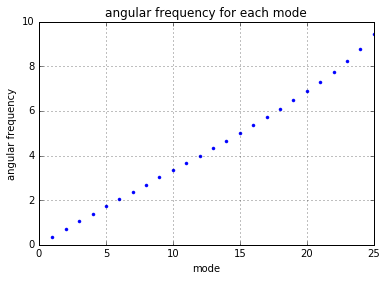

In [5]:
mass = 1.0 #mass of beads

#creates array for bead number
x = np.arange(1,n+1)

#calculates angular frequency for each bead
angfreq = np.sqrt(eigval/mass)

plt.plot(x,angfreq, 'b.')
plt.xlabel("mode")
plt.ylabel("angular frequency")
plt.grid()
plt.title("angular frequency for each mode")

### 4. Plot the bead displacements as a function of bead number for each of the three lowest normal modes.

Now we are going to plot bead displacements for the 3 lowest modes

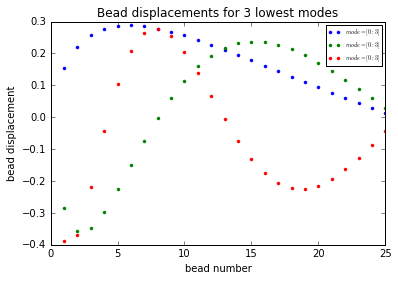

In [6]:
#loop that plots bead displacement of each bead for 3 lowest modes
for i in range(3):
    bead = np.arange(1,n+1,1) #creates array for bead number
    eigv = eigvec[:,i] #extracts bead displacement values from array
    plt.plot(bead,eigv,'.',label = '$mode = [0:3]$'.format(i=1))
    plt.legend(loc = 'best', prop={'size':6})
    
plt.title("Bead displacements for 3 lowest modes")
plt.xlabel("bead number")
plt.ylabel("bead displacement")